<a href="https://colab.research.google.com/github/Nandan-2004/Satellite-Image-Based-Disaster-Detection/blob/main/week2_baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile
import kagglehub

#Load Dataset

In [3]:
path = kagglehub.dataset_download("naiyakhalid/flood-prediction-dataset")
print("Path to dataset files:", path)

100%|██████████| 680k/680k [00:00<00:00, 70.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/naiyakhalid/flood-prediction-dataset/versions/1


In [5]:
print("Contents of the dataset directory:")
print(os.listdir(path))

Contents of the dataset directory:
['flood.csv']


In [13]:
csv_file_path = os.path.join(path, 'flood.csv')
df = pd.read_csv(csv_file_path)
print("Shape of dataset:", df.shape)



Shape of dataset: (50000, 21)


In [17]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  50000 non-null  int64  
 12  CoastalVulnerabili

In [18]:
df.head(5)

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475


In [21]:
print("Missing values per column:\n", df.isnull().sum())
df.fillna(df.median(numeric_only=True), inplace=True)
df.fillna('Unknown', inplace=True)

Missing values per column:
 MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64


# Exploratory Data Analysis (EDA)

<Figure size 1500x600 with 0 Axes>

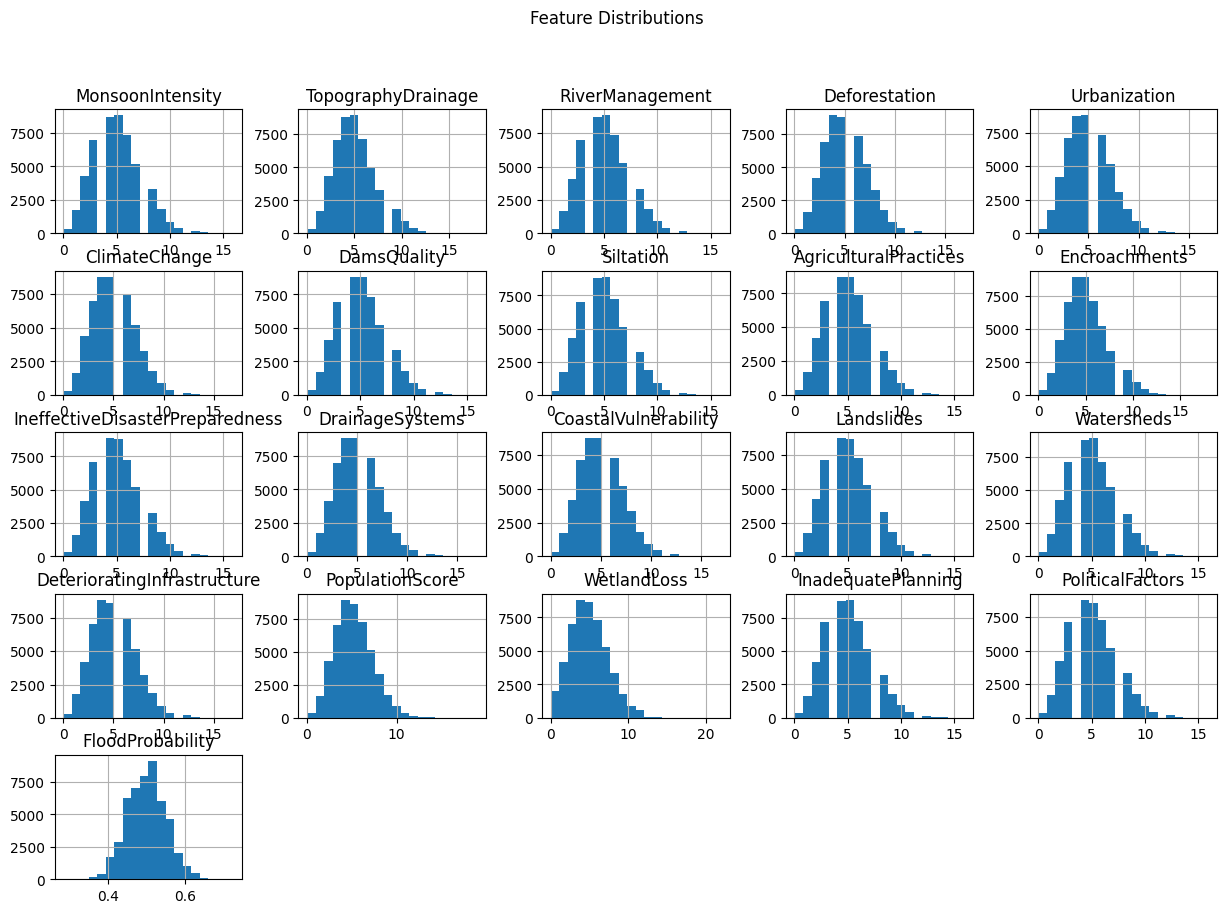

In [25]:
# Define numeric_cols by selecting numeric columns from the DataFrame
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# Target distribution plot replaced with feature distributions
plt.figure(figsize=(15,6))
df[numeric_cols].hist(bins=20, figsize=(15,10))
plt.suptitle("Feature Distributions")
plt.show()


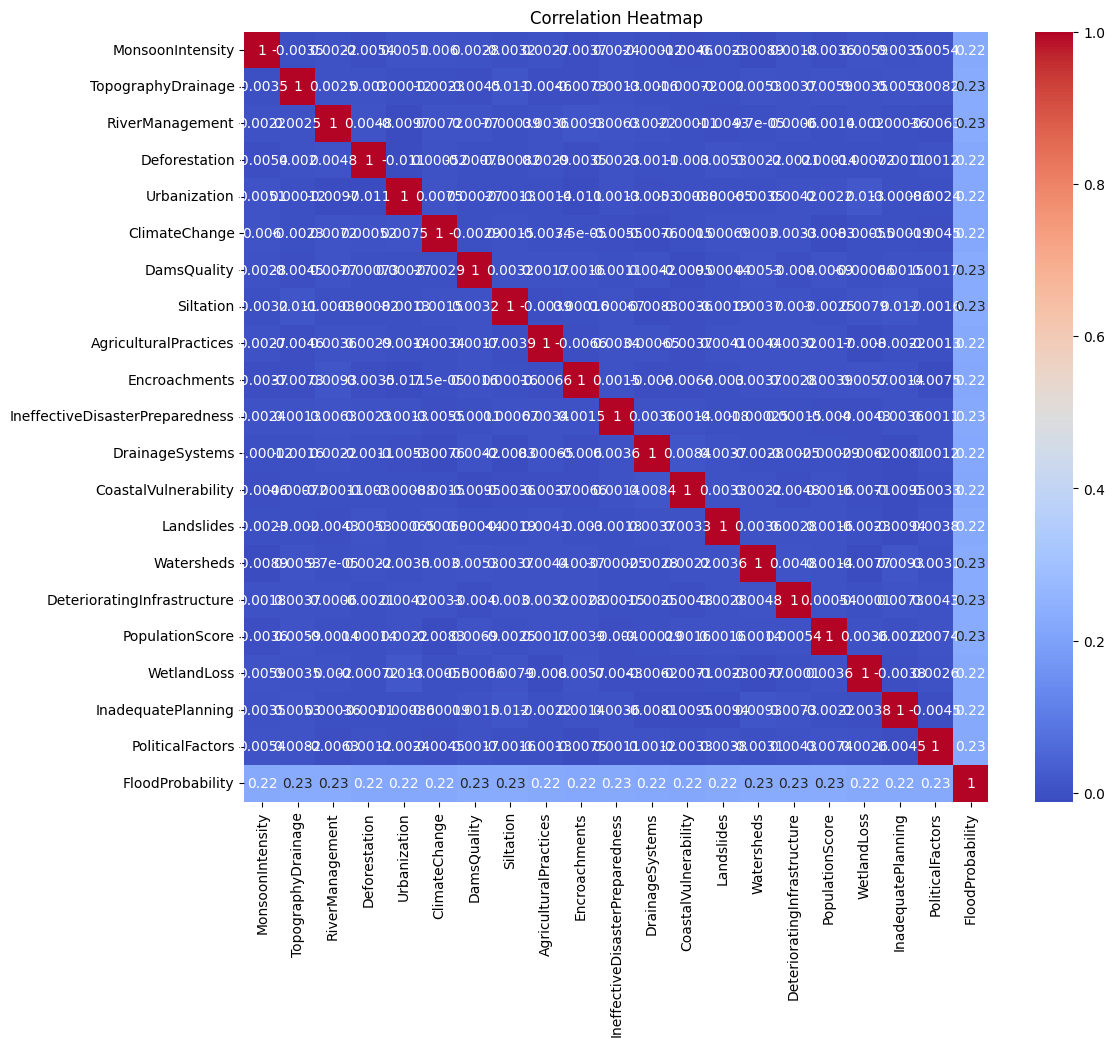

In [26]:

# Correlation heatmap for numeric features
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

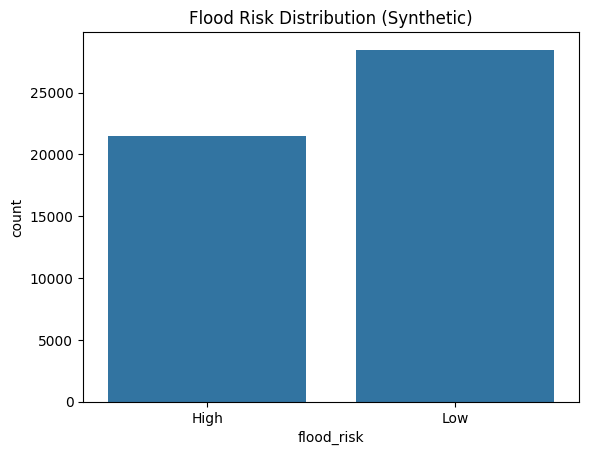

In [27]:
# Simple synthetic label creation for demonstration
df['flood_risk'] = np.where(
    (df['MonsoonIntensity'] + df['TopographyDrainage'] + df['RiverManagement']) > 15,
    'High', 'Low'
)
sns.countplot(x='flood_risk', data=df)
plt.title("Flood Risk Distribution (Synthetic)")
plt.show()
